## SVD演算法
- 透過keras手刻!
- 元素
    - embedding layer將user_id、item_id 嵌入到稠密的latent 向量空間。
    - dot product，將user vector與item vector做點積使得得到分數
    - 分數與實際值做SGD、誤差反向傳地將參數更新。
- 結果
    - 理解沒問題了!與surprise套件相比較也差不多!

In [50]:
# data

## 讀取.data: https://blog.csdn.net/qq_24509229/article/details/80214613
## ml-100k資料說明: https://files.grouplens.org/datasets/movielens/ml-100k-README.txt
## ml-100k原始讀取...
import numpy as np
import pandas as pd


df = []

with open('./ml-100k/u.data') as f:
    for row in f:
        data = row.split()
        df.append(data)

df = pd.DataFrame(df, columns=['userID', 'itemID', 'rating', 'timestamp'])
df['rating'] = df['rating'].apply(func=lambda x: int(x)/5)
df['userID'] = df['userID'].astype(int)
df['itemID'] = df['itemID'].astype(int)
df.head()

,userID,itemID,rating,timestamp
0,196,242,0.6,881250949
1,186,302,0.6,891717742
2,22,377,0.2,878887116
3,244,51,0.4,880606923
4,166,346,0.2,886397596


In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Dense, Flatten, Multiply

In [82]:
class SVDKeras(tf.keras.Model):
    def __init__(self, num_users, num_items, k):
        super(SVDKeras, self).__init__()
        self.user_embedding = Embedding(input_dim=num_users, output_dim=k, input_length=1)
        self.item_embedding = Embedding(input_dim=num_items, output_dim=k, input_length=1)
        self.multiply = Multiply()
        self.flatten = Flatten()
        self.dense = Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        user_ids = inputs[:, 0]
        item_ids = inputs[:, 1]
        
        user_vectors = self.user_embedding(user_ids)
        item_vectors = self.item_embedding(item_ids)
        
        user_vectors = self.flatten(user_vectors)
        item_vectors = self.flatten(item_vectors)
        
        f_output = self.multiply([user_vectors, item_vectors])
        f_output = self.dense(f_output)
        
        return f_output

In [83]:
X = df[['userID', 'itemID']].values
y = df[['rating']].values.flatten()

X.shape, y.shape

((100000, 2), (100000,))

In [84]:
x_train, x_test = X[:80000], X[80000:]
y_train, y_test = y[:80000], y[80000:]

In [85]:
svd_keras = SVDKeras(num_users=943+1, num_items=1682+1, k=100)
svd_keras.compile(optimizer='adam', loss='mean_squared_error')
history = svd_keras.fit(x=x_train, y=y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.0798 - val_loss: 0.0418
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0381 - val_loss: 0.0359
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.0286 - val_loss: 0.0338
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0193 - val_loss: 0.0344
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0129 - val_loss: 0.0360
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0090 - val_loss: 0.0375
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0065 - val_loss: 0.0387
Epoch 8/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0051 - val_loss: 0.0398
Epoch 9/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0039 - val_loss: 0.0407
Epoch 10/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0032 - val_loss: 0.0417

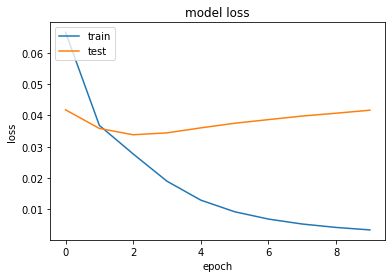

In [86]:
import matplotlib.pyplot as plt


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [87]:
# 看一下10個預測值
for i in range(100):
    user_id, item_id = x_test[i]
    print(f'svd預測: {svd_keras.predict(np.array([[user_id, item_id]]))[0][0]}', f'，真實值: {y_test[i]}')

svd預測: 0.7331523299217224 ，真實值: 0.8
svd預測: 0.507182776927948 ，真實值: 0.2
svd預測: 0.8014093637466431 ，真實值: 0.2
svd預測: 0.8306746482849121 ，真實值: 0.4
svd預測: 0.8069812059402466 ，真實值: 0.8
svd預測: 0.8977518081665039 ，真實值: 1.0
svd預測: 0.8405638933181763 ，真實值: 0.6
svd預測: 0.4550999701023102 ，真實值: 0.4
svd預測: 0.7683990001678467 ，真實值: 1.0
svd預測: 0.37953534722328186 ，真實值: 0.6
svd預測: 0.43177884817123413 ，真實值: 0.4
svd預測: 0.6642760038375854 ，真實值: 0.8
svd預測: 0.9628728628158569 ，真實值: 1.0
svd預測: 0.7425540685653687 ，真實值: 0.8
svd預測: 0.7915084958076477 ，真實值: 0.8
svd預測: 0.8004331588745117 ，真實值: 0.6
svd預測: 0.47594594955444336 ，真實值: 0.2
svd預測: 0.5152420997619629 ，真實值: 0.8
svd預測: 0.9742377996444702 ，真實值: 1.0
svd預測: 0.5999801158905029 ，真實值: 0.8
svd預測: 0.8750436305999756 ，真實值: 0.8
svd預測: 0.6908552646636963 ，真實值: 0.8
svd預測: 0.8674967288970947 ，真實值: 1.0
svd預測: 0.7308075428009033 ，真實值: 0.6
svd預測: 0.8426254987716675 ，真實值: 0.8
svd預測: 0.7239822149276733 ，真實值: 0.8
svd預測: 0.7358871102333069 ，真實值: 0.6
svd預測: 0.6552743911743164 

In [88]:
svd.summary()

Model: "svd_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     multiple                  94400     
_________________________________________________________________
embedding_28 (Embedding)     multiple                  168300    
_________________________________________________________________
multiply_12 (Multiply)       multiple                  0         
_________________________________________________________________
flatten_12 (Flatten)         multiple                  0         
_________________________________________________________________
dense_11 (Dense)             multiple                  101       
Total params: 262,801
Trainable params: 262,801
Non-trainable params: 0
_________________________________________________________________


In [80]:
## 拿surprice來看看結果

from surprise import SVD, Dataset, Reader

reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(df=df[['userID', 'itemID', 'rating']].iloc[0:80000, :], reader=reader)
trainset = data.build_full_trainset()

svd_surprise = SVD(n_factors=64)
svd_surprise.fit(trainset)

In [89]:
# 看一下10個預測值
for i in range(100):
    user_id, item_id = x_test[i]
    print(f'svd_keras 預測: {svd_keras.predict(np.array([[user_id, item_id]]))[0][0]}', f'svd_surprise 預測: {svd_surprise.predict(user_id, item_id).est}', f'，真實值: {y_test[i]}')

svd_keras 預測: 0.7331523299217224 svd_surprise 預測: 0.7273477684285234 ，真實值: 0.8
svd_keras 預測: 0.507182776927948 svd_surprise 預測: 0.521134523544319 ，真實值: 0.2
svd_keras 預測: 0.8014093637466431 svd_surprise 預測: 0.5670011600664306 ，真實值: 0.2
svd_keras 預測: 0.8306746482849121 svd_surprise 預測: 0.7410150252517772 ，真實值: 0.4
svd_keras 預測: 0.8069812059402466 svd_surprise 預測: 0.760900171945373 ，真實值: 0.8
svd_keras 預測: 0.8977518081665039 svd_surprise 預測: 0.9818170609547092 ，真實值: 1.0
svd_keras 預測: 0.8405638933181763 svd_surprise 預測: 0.7166361098226032 ，真實值: 0.6
svd_keras 預測: 0.4550999701023102 svd_surprise 預測: 0.5099729669793798 ，真實值: 0.4
svd_keras 預測: 0.7683990001678467 svd_surprise 預測: 0.8117153158710182 ，真實值: 1.0
svd_keras 預測: 0.37953534722328186 svd_surprise 預測: 0.7055909604241074 ，真實值: 0.6
svd_keras 預測: 0.43177884817123413 svd_surprise 預測: 0.7091820949492603 ，真實值: 0.4
svd_keras 預測: 0.6642760038375854 svd_surprise 預測: 0.6868083673780273 ，真實值: 0.8
svd_keras 預測: 0.9628728628158569 svd_surprise 預測: 0.7

In [91]:
y_pred_keras = svd_keras.predict(x_test)

y_pred_surprise = []
for i in range(len(x_test)):
    y_pred_surprise.append(svd_surprise.predict(x_test[i][0], x_test[i][1]).est)

In [92]:
## MAE評斷

from tensorflow.keras.metrics import mse, mae

# MSE
print('SVDKeras MSE: ', mse(y_test, y_pred_keras.flatten()))
print('SVDSurprise MSE: ', mse(y_test, y_pred_surprise))

# MAE
print('SVDKeras MAE: ', mae(y_test, y_pred_keras.flatten()))
print('SVDSurprise MAE: ', mae(y_test, y_pred_surprise))

SVDKeras MSE:  tf.Tensor(0.041680608, shape=(), dtype=float32)
SVDSurprise MSE:  tf.Tensor(0.03728548199773307, shape=(), dtype=float64)
SVDKeras MAE:  tf.Tensor(0.15908265, shape=(), dtype=float32)
SVDSurprise MAE:  tf.Tensor(0.15317689448546898, shape=(), dtype=float64)
